In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('Advertising.csv')

In [4]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
dataset.shape

(200, 5)

In [8]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


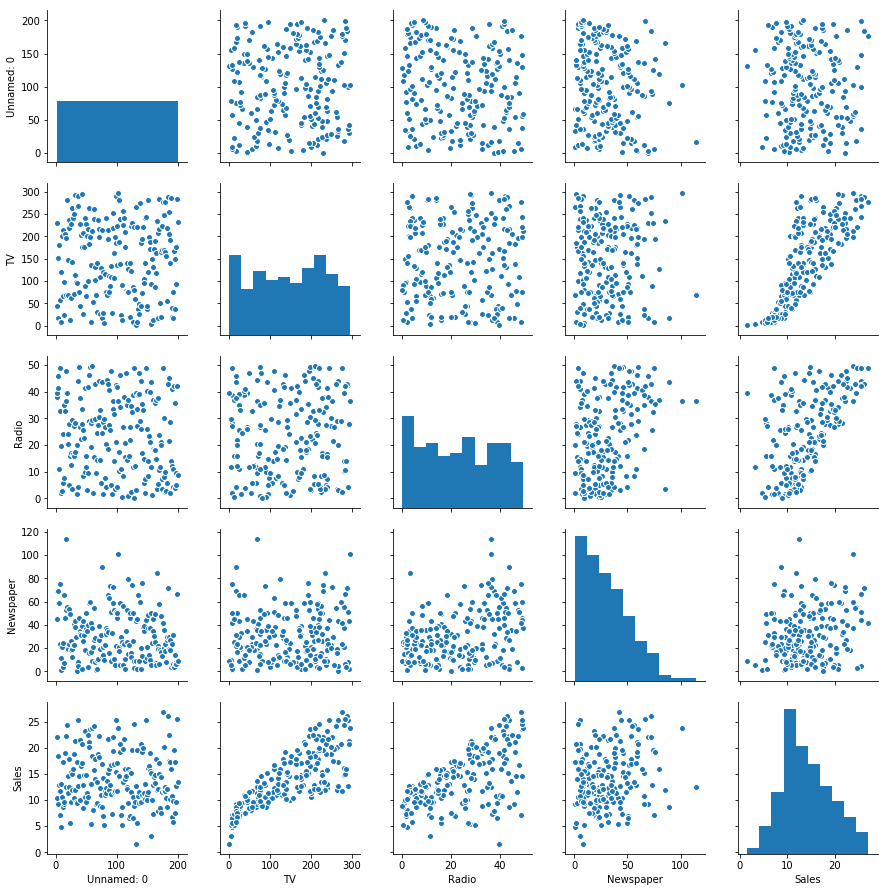

In [9]:
sns.pairplot(dataset)

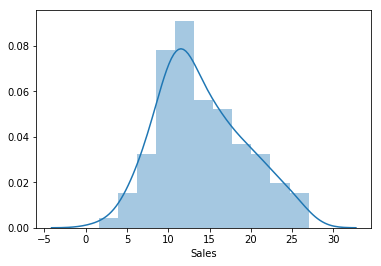

In [11]:
sns.distplot(dataset['Sales'])

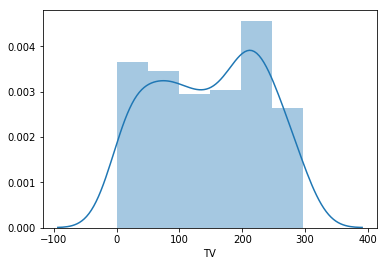

In [32]:
sns.distplot(dataset['TV'])

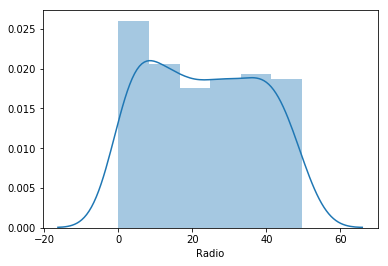

In [33]:
sns.distplot(dataset['Radio'])

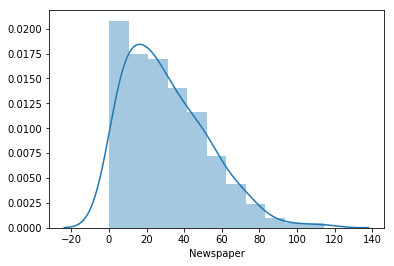

In [34]:
sns.distplot(dataset['Newspaper'])

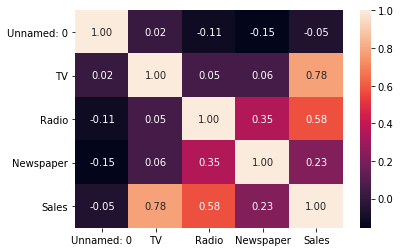

In [36]:
sns.heatmap(dataset.corr(), annot=True, fmt='.2f')

In [13]:
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.046353
Radio,0.187757
Newspaper,-0.005778


In [17]:
import statsmodels.api as sm

C:\Users\gkumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
X_endog = sm.add_constant(X_train)

In [19]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [20]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     441.6
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           5.51e-76
Time:                        09:02:51   Log-Likelihood:                -312.61
No. Observations:                 160   AIC:                             633.2
Df Residuals:                     156   BIC:                             645.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0310      0.357      8.487      0.000       2.326       3.736
TV             0.0464      0.002     28.804      0.000       0.043       0.050
Radio          0.1878      0.010     19.135      0.000       0.168       0.207
Newspaper     -0.0058      0.007     -0.872      0.384      -0.019       0.007
==============================================================================
Omnibus:                       55.686   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.509
Skew:                          -1.432   Prob(JB):                     5.64e-33
Kurtosis:                       6.752   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
y_pred = regressor.predict(X_train)

In [50]:
X_test.shape

(40, 3)

In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 1.2706044439819906
Mean Squared Error: 2.9144975134850797
Root Mean Squared Error: 1.7071899465159346


In [21]:
#changing the model by removing the newspaper
X1 = dataset[['TV', 'Radio']]
y1 = dataset['Sales']

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=24)

In [55]:
regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
coeff_df1 = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])
coeff_df1

,Coefficient
TV,0.046389
Radio,0.184767


In [27]:
X1_endog = sm.add_constant(X1_train)

In [30]:
res = sm.OLS(y1_train, X1_endog)
res.fit()

In [31]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     663.0
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.77e-77
Time:                        09:08:53   Log-Likelihood:                -313.00
No. Observations:                 160   AIC:                             632.0
Df Residuals:                     157   BIC:                             641.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9180      0.333      8.774      0.000       2.261       3.575
TV             0.0464      0.002     28.859      0.000       0.043       0.050
Radio          0.1848      0.009     20.110      0.000       0.167       0.203
==============================================================================
Omnibus:                       52.757   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.787
Skew:                          -1.391   Prob(JB):                     6.56e-29
Kurtosis:                       6.425   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
y1_pred = regressor1.predict(X1_train)

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_train, y1_pred)))

Mean Absolute Error: 1.284578938587654
Mean Squared Error: 2.928719326629756
Root Mean Squared Error: 1.7113501472900734
